In [5]:
# code for resolving an error for basemap. To find the right path
import os
os.environ['PROJ_LIB'] = r'C:\Users\Karin\Anaconda3\Library\share'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

From scientific fields like meteorology and climatology, through to the software on our smartphones like Google Maps and Facebook check-ins, geographic data is always present in our everyday lives.
We'll be working with flight data from the [openflights website](https://openflights.org/data.html). Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

* airlines.csv - data on each airline.
    * country - where the airline is headquartered.
    * active - if the airline is still active.

* airports.csv - data on each airport.
   * name - name of the airport.
   * city - city the airport is located.
   * country - country the airport is located.
   * code - unique airport code.
   * latitude - latitude value.
   * longitude - longitude value.

* routes.csv - data on each flight route.
    * airline - airline for the route.
    * source - starting city for the route.
    * dest - destination city for the route.

In [13]:
# read data sets in 
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

In [16]:
airlines.head(2)

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N


In [17]:
airports.head(2)

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby


In [18]:
routes.head(2)

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2


# Basemap
When working with two-dimensional maps we will need to do the following:

1. Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
2. Convert spherical coordinates to Cartesian coordinates using the basemap instance.
3. Use the matplotlib and basemap methods to customize the map.
4. Display the map.

A [map projection](https://en.wikipedia.org/wiki/Map_projection) transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve. We'll use the [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection), because it is commonly used by popular mapping software.

### 1. Create a new basemap instance
To create a new instance of the basemap class, we call the basemap constructor and pass in values for the required parameters:

* projection: the map projection.
* llcrnrlat: latitude of lower left hand corner of the desired map domain
* urcrnrlat: latitude of upper right hand corner of the desired map domain
* llcrnrlon: longitude of lower left hand corner of the desired map domain
* urcrnrlon: longitude of upper right hand corner of the desired map domain


In [7]:
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)

### 2. Convert to Cartesian coordinates
We need to convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map. We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of longitude and latitude values using the projection `merc` we specified earlier. The constructor only accepts list values, so we'll need to use `Series.tolist()` to convert the longitude and latitude columns from the airports dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values:

In [19]:
x, y = m(airports["longitude"].tolist(), airports["latitude"].tolist())

### 3. Customise the map
Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of `x` and `y` coordinates, we use the `basemap.scatter()` method.

The `basemap.scatter()` method has similar parameters to the `pyplot.scatter()`. For example, we can customize the size of each marker using the `s` parameter.

We can display the coast lines using the `basemap.drawcoastlines()` method.

Because basemap uses matplotlib under the hood, we can interact with the matplotlib classes that basemap uses directly to customize the appearance of the map.

We can add code that:

* uses `pyplot.subplots()` to specify the figsize parameter
* returns the Figure and Axes object for a single subplot and assigns to fig and ax respectively
* use the `Axes.set_title()` method to set the map title


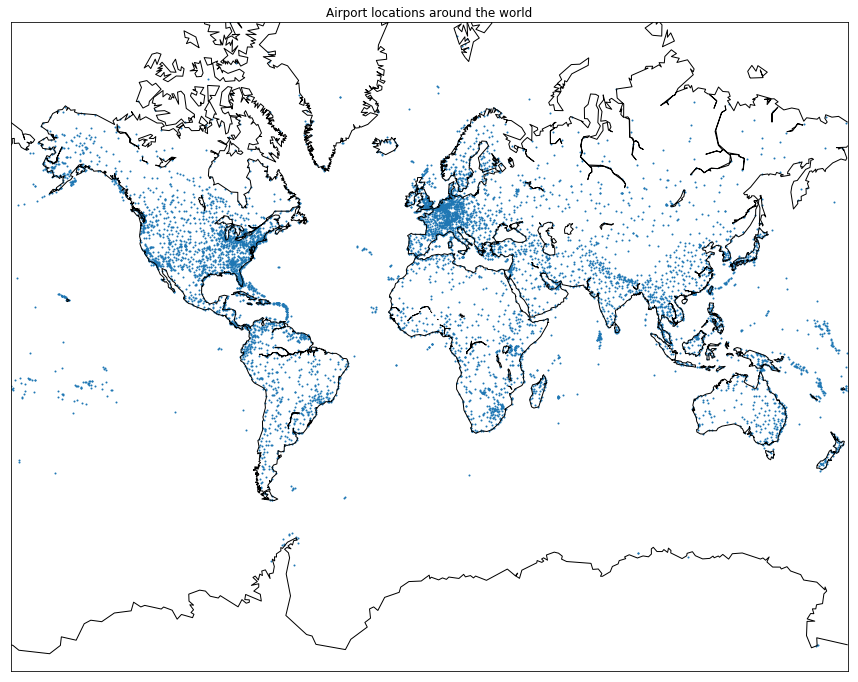

In [33]:
fig, ax = plt.subplots(figsize = (15, 20))

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

x, y = m(airports["longitude"].tolist(), airports["latitude"].tolist())
m.scatter(x, y, s=1)
m.drawcoastlines()

ax.set_title("Airport locations around the world")
plt.show()


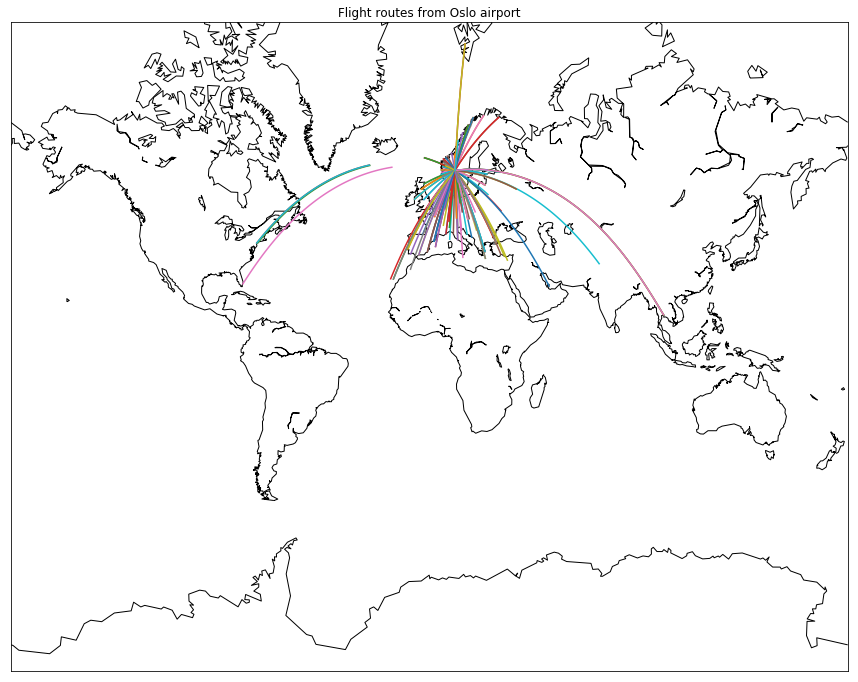

In [37]:
geo_routes = pd.read_csv("geo_routes.csv")
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

# Function to create the circles routes. Basemap cannot handle routes where it goes over 180 degrees
def create_great_circles(dataframe):
    for index, row in dataframe.iterrows():
        if abs(row[5] - row[4]) < 180 and abs(row[7] - row[6]) < 180:
            m.drawgreatcircle(row[4], row[6], row[5], row[7])

dfw = geo_routes[geo_routes["source"] == "OSL"]

create_great_circles(dfw)
ax.set_title("Flight routes from Oslo airport")
plt.show()

### Robinson map projection
Due to that some route lines are interrupted we will try another map projection. Find more information on Robinson projection [here](https://en.wikipedia.org/wiki/Robinson_projection). 

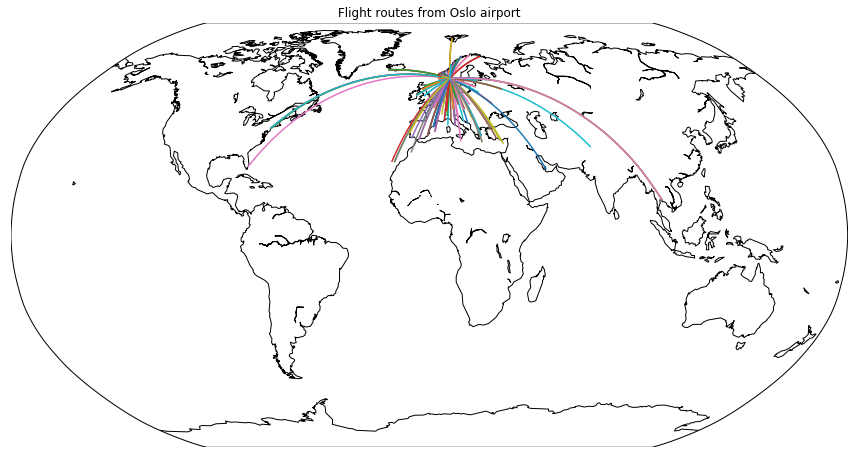

In [38]:
# using Robinson projection will give us no routes interruption
geo_routes = pd.read_csv("geo_routes.csv")
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='robin', lon_0=0)
m.drawcoastlines()

# Function to create the circles routes. Basemap cannot handle routes where it goes over 180 degrees
def create_great_circles(dataframe):
    for index, row in dataframe.iterrows():
        if abs(row[5] - row[4]) < 180 and abs(row[7] - row[6]) < 180:
            m.drawgreatcircle(row[4], row[6], row[5], row[7])

dfw = geo_routes[geo_routes["source"] == "OSL"]

create_great_circles(dfw)
ax.set_title("Flight routes from Oslo airport")
plt.show()